<a href="https://colab.research.google.com/github/beulah-s/DS_Bootcamp_2023/blob/main/Lab12_samuel_beulah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Classifer_credit risk**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [75]:
credit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/german_credit_data.csv", index_col=0)

In [76]:
credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [77]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [78]:
credit.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [79]:
credit['Saving accounts'].fillna('no_info', inplace=True)
credit['Checking account'].fillna('no_info', inplace=True)


In [80]:
credit.duplicated().sum()

0

In [81]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


#### **Build Classifier**
##### Naive Bayes Algorithm, Decision Tree Algorithm, KNN, and LogisticRegression

In [82]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,no_info,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,no_info,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [83]:
# Work only with the numerical columns
# Convert risk to numerical value
label_encoder = LabelEncoder()

label_encoder.fit_transform(credit["Risk"])
# print risk classes and number associated with the risk values
print("Risk classes: ", label_encoder.classes_)
print("Risk classes numeric values: ", label_encoder.transform(label_encoder.classes_))

# Convert values
credit["Risk"] = label_encoder.fit_transform(credit["Risk"])

Risk classes:  ['bad' 'good']
Risk classes numeric values:  [0 1]


In [84]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,no_info,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,no_info,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


<Axes: >

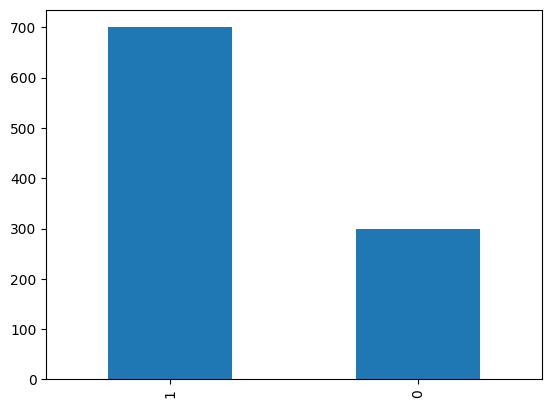

In [85]:
#Simple plot to visualize number of values per credit class
credit["Risk"].value_counts().plot(kind='bar')

In [86]:
# Age, Job, Credit amount and Duration
X = credit[["Age","Job","Credit amount","Duration"]]
Y = credit["Risk"]
print(X,Y)

     Age  Job  Credit amount  Duration
0     67    2           1169         6
1     22    2           5951        48
2     49    1           2096        12
3     45    2           7882        42
4     53    2           4870        24
..   ...  ...            ...       ...
995   31    1           1736        12
996   40    3           3857        30
997   38    2            804        12
998   23    2           1845        45
999   27    2           4576        45

[1000 rows x 4 columns] 0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64


In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

### **Train Classifiers**
#### **1. Naive Bayes**

In [88]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
y_pred_nb = nb.predict(X_test)
print("Accuracy of the Naive Bayes classifier: ", accuracy_score(Y_test, y_pred_nb))
print("Precision of the Naive Bayes classifier: ", precision_score(Y_test, y_pred_nb))
print("Recall score of the Naive Bayes classifier: ", recall_score(Y_test, y_pred_nb))
print("f1 score of the Naive Bayes classifier: ", f1_score(Y_test, y_pred_nb))

Accuracy of the Naive Bayes classifier:  0.695
Precision of the Naive Bayes classifier:  0.7247191011235955
Recall score of the Naive Bayes classifier:  0.9148936170212766
f1 score of the Naive Bayes classifier:  0.8087774294670846


#### **2. Decision Tree Classifier**

In [89]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy of the Decision Tree classifier: ", accuracy_score(Y_test, y_pred_dt))
print("Precision of the Decision Tree classifier: ", precision_score(Y_test, y_pred_dt))
print("Recall score of the Decision Tree classifier: ", recall_score(Y_test, y_pred_dt))
print("f1 score of the Decision Tree classifier: ", f1_score(Y_test, y_pred_dt))

Accuracy of the Decision Tree classifier:  0.615
Precision of the Decision Tree classifier:  0.7424242424242424
Recall score of the Decision Tree classifier:  0.6950354609929078
f1 score of the Decision Tree classifier:  0.717948717948718


#### **3. kNN Classifier**

In [90]:
# Check for different values of k. Iterate over values of 1 to 25
k_values = range(1,26)
knn_accuracies =[]
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  knn_accuracies.append(accuracy_score(Y_test, knn.predict(X_test)))


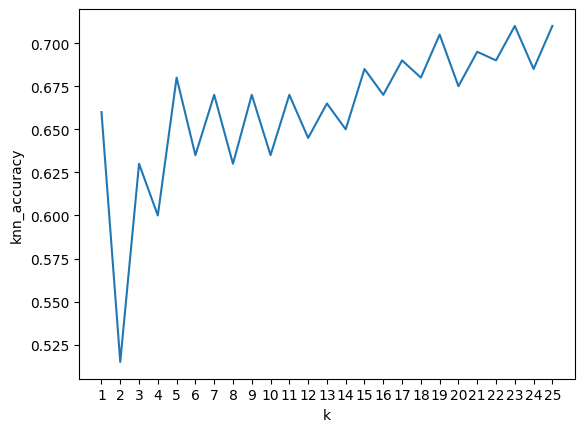

Best k value is :  23


In [91]:
# Plot accuracy scores against different values of k
plt.plot(k_values, knn_accuracies)
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('knn_accuracy')
plt.show()
print("Best k value is : ", k_values[np.argmax(knn_accuracies)])

In [92]:
knn_23 = KNeighborsClassifier(n_neighbors=23)
knn_23.fit(X_train,Y_train)
y_pred_knn = knn_23.predict(X_test)

print("Accuracy of the KNeighborsClassifier: ", accuracy_score(Y_test, y_pred_knn))
print("Precision of the KNeighborsClassifier: ", precision_score(Y_test, y_pred_knn))
print("Recall score of the KNeighborsClassifier: ", recall_score(Y_test, y_pred_knn))
print("f1 score of the KNeighborsClassifier: ", f1_score(Y_test, y_pred_knn))


Accuracy of the KNeighborsClassifier:  0.71
Precision of the KNeighborsClassifier:  0.7150259067357513
Recall score of the KNeighborsClassifier:  0.9787234042553191
f1 score of the KNeighborsClassifier:  0.8263473053892215


#### **4. Logistic Regression**

In [93]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_pred_lg = log_reg.predict(X_test)

print("Accuracy of the LogisticRegression: ", accuracy_score(Y_test, y_pred_lg))
print("Precision of the LogisticRegression: ", precision_score(Y_test, y_pred_lg))
print("Recall score of the LogisticRegression: ", recall_score(Y_test, y_pred_lg))
print("f1 score of the LogisticRegression: ", f1_score(Y_test, y_pred_lg))



Accuracy of the LogisticRegression:  0.73
Precision of the LogisticRegression:  0.7301587301587301
Recall score of the LogisticRegression:  0.9787234042553191
f1 score of the LogisticRegression:  0.8363636363636363


### **Perform cross-validation on the entire dataset**

In [94]:
# X = credit[["Age","Job","Credit amount","Duration"]]
# Y = credit["Risk"]

cv_nb = cross_val_score(nb, X, Y, cv=10).mean()
cv_nb

0.705

In [95]:
cv_dt = cross_val_score(dt, X, Y, cv=10).mean()
cv_knn = cross_val_score(knn_23, X, Y, cv=10).mean()
cv_lg = cross_val_score(log_reg, X, Y, cv=10).mean()

print("Cross validation accuracy for Naive Bayes: ",cv_nb)
print("Cross validation accuracy for Decision Tree: ",cv_dt)
print("Cross validation accuracy for kNN: ",cv_knn)
print("Cross validation accuracy for Logistic Regression: ",cv_lg)

Cross validation accuracy for Naive Bayes:  0.705
Cross validation accuracy for Decision Tree:  0.618
Cross validation accuracy for kNN:  0.6969999999999998
Cross validation accuracy for Logistic Regression:  0.705


### **Print confusion matrix for all 4 classifiers**

In [96]:
cm_nb = confusion_matrix(Y_test, y_pred_nb)
cm_dt = confusion_matrix(Y_test, y_pred_dt)
cm_knn =confusion_matrix(Y_test, y_pred_knn)
cm_lg = confusion_matrix(Y_test, y_pred_lg)

print("Confusion matrix for Naive Bayes\n", cm_nb)
print("Confusion matrix for Decision Tree\n", cm_dt)
print("Confusion matrix for knn\n", cm_knn)
print("Confusion matrix for Logistic Regression\n", cm_lg)

Confusion matrix for Naive Bayes
 [[ 10  49]
 [ 12 129]]
Confusion matrix for Decision Tree
 [[25 34]
 [43 98]]
Confusion matrix for knn
 [[  4  55]
 [  3 138]]
Confusion matrix for Logistic Regression
 [[  8  51]
 [  3 138]]


In [97]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 85.9+ KB


### **Convert categorical columns to numerical columns using One Hot Encoding**

In [98]:
# using a for loop, perform one hot encoding an all columns
for col in credit.columns:
  # check the type of columns
  # if the type is 'object', means it is categorical
  if credit[col].dtype == 'object':
    dummy = pd.get_dummies(credit[col], prefix=col)
    credit = pd.concat([credit, dummy], axis=1)
    credit.drop(col, axis=1, inplace=True)
credit

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_no_info,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
996,40,3,3857,30,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
997,38,2,804,12,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
998,23,2,1845,45,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


<Axes: >

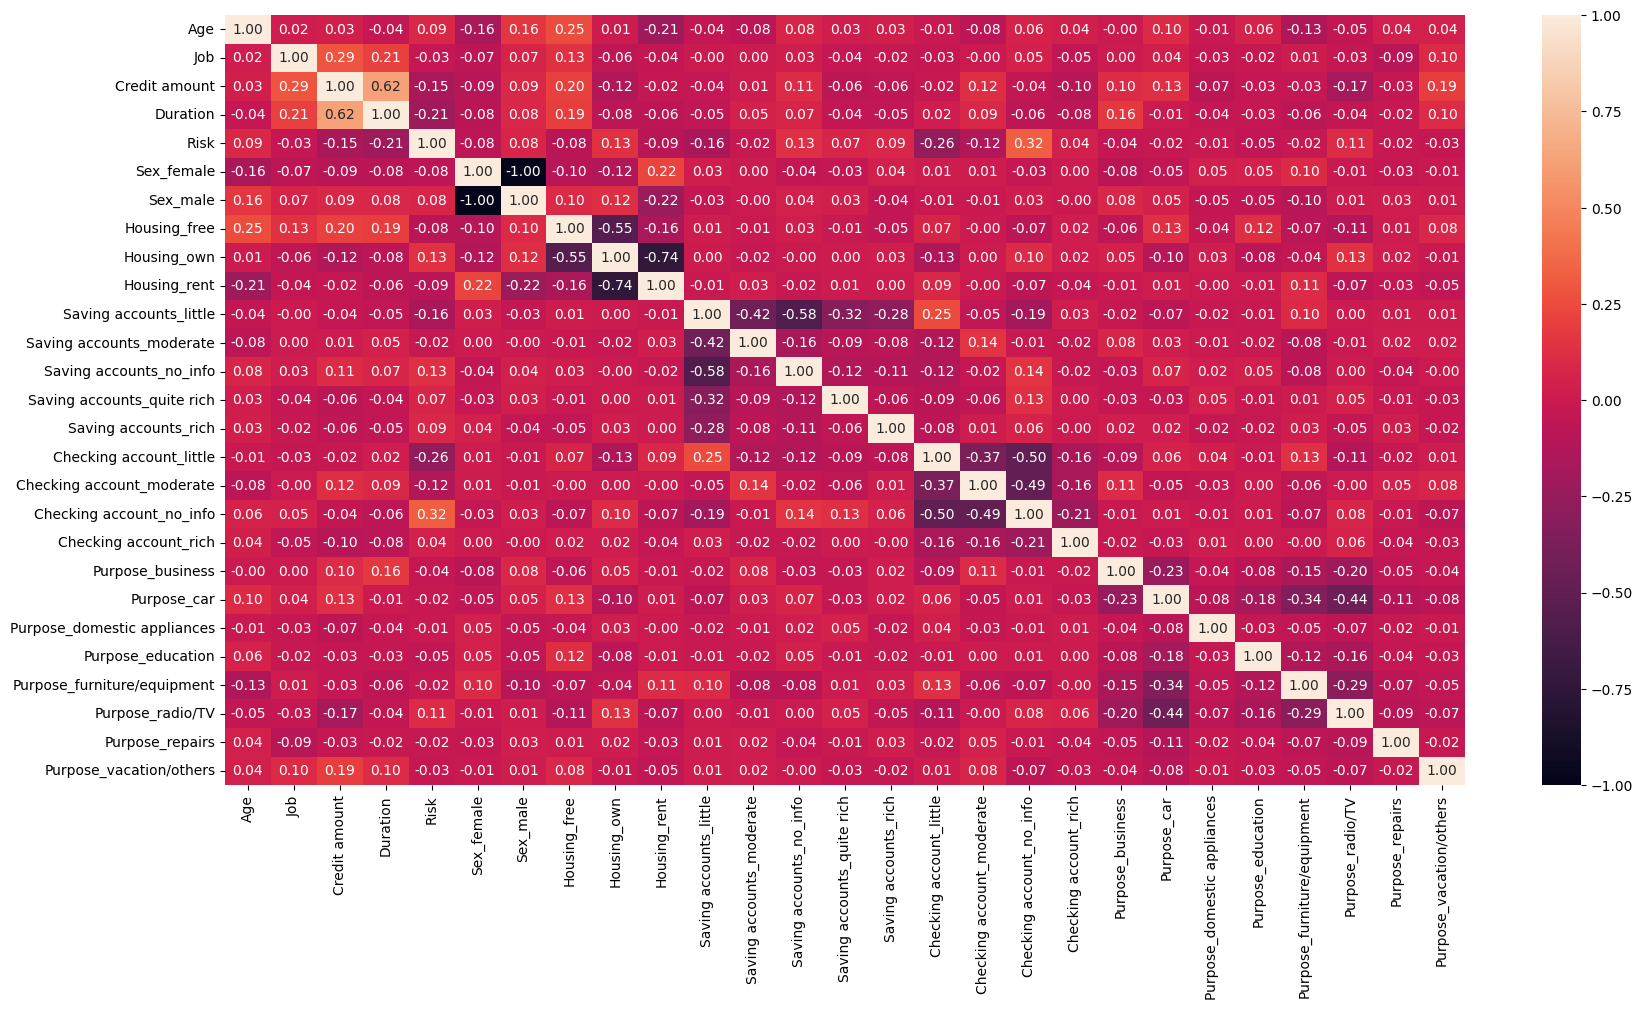

In [99]:
plt.figure(figsize=(20, 10))
sns.heatmap(credit.corr(), annot=True, fmt=".2f")

#### **Build model using entire dataset of encoded features**

In [100]:
# Create X and Y variables, and split into test and training set
X = credit.drop(["Risk"], axis=1)
Y = credit["Risk"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state=42)

In [101]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)
y_pred = nb_classifier.predict(X_test)

print("Accuracy of Naive Bayes Classifier: ", accuracy_score(Y_test, y_pred))
print("Precision of Naive Bayes Classifier: ", precision_score(Y_test, y_pred))
print("Recall of Naive Bayes Classifier: ", recall_score(Y_test, y_pred))
print("f1 of Naive Bayes Classifier: ", f1_score(Y_test, y_pred))
print("Confusion matrix for Naive Bayes:\n", confusion_matrix(Y_test, y_pred))

print("Cross validation accuracy for Naive Bayes: ", cross_val_score(nb_classifier, X,Y, cv=10).mean())

Accuracy of Naive Bayes Classifier:  0.665
Precision of Naive Bayes Classifier:  0.7761194029850746
Recall of Naive Bayes Classifier:  0.7375886524822695
f1 of Naive Bayes Classifier:  0.7563636363636363
Confusion matrix for Naive Bayes:
 [[ 29  30]
 [ 37 104]]
Cross validation accuracy for Naive Bayes:  0.698


In [102]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)
y_pred = dt_classifier.predict(X_test)

print("Accuracy of Decision Tree Classifier: ", accuracy_score(Y_test, y_pred))
print("Precision of Decision Tree Classifier: ", precision_score(Y_test, y_pred))
print("Recall of Decision Tree Classifier: ", recall_score(Y_test, y_pred))
print("f1 of Decision Tree Classifier: ", f1_score(Y_test, y_pred))
print("Confusion matrix for Decision Tree:\n", confusion_matrix(Y_test, y_pred))

print("Cross validation accuracy for Decision Tree: ", cross_val_score(dt_classifier, X,Y, cv=10).mean())

Accuracy of Decision Tree Classifier:  0.655
Precision of Decision Tree Classifier:  0.7857142857142857
Recall of Decision Tree Classifier:  0.7021276595744681
f1 of Decision Tree Classifier:  0.7415730337078651
Confusion matrix for Decision Tree:
 [[32 27]
 [42 99]]
Cross validation accuracy for Decision Tree:  0.6759999999999999


In [103]:
k_values = range(1,26)
knn_accuracies =[]
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  knn_accuracies.append(accuracy_score(Y_test, knn.predict(X_test)))


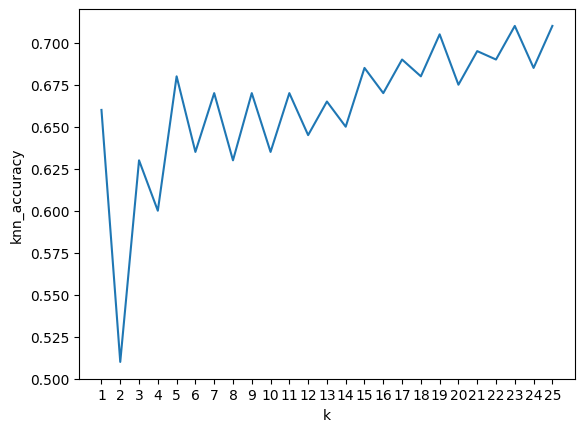

Best k value is :  23


In [104]:
plt.plot(k_values, knn_accuracies)
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('knn_accuracy')
plt.show()
print("Best k value is : ", k_values[np.argmax(knn_accuracies)])

In [105]:
knn_23_classifier = KNeighborsClassifier(n_neighbors=23)
knn_23_classifier.fit(X_train, Y_train)
y_pred = knn_23_classifier.predict(X_test)

print("Accuracy of knn Classifier: ", accuracy_score(Y_test, y_pred))
print("Precision of knn Classifier: ", precision_score(Y_test, y_pred))
print("Recall of knn Classifier: ", recall_score(Y_test, y_pred))
print("f1 of knn Classifier: ", f1_score(Y_test, y_pred))
print("Confusion matrix for knn Classifier:\n", confusion_matrix(Y_test, y_pred))

print("Cross validation accuracy for knn classifier: ", cross_val_score(knn_23_classifier, X,Y, cv=10).mean())

Accuracy of knn Classifier:  0.71
Precision of knn Classifier:  0.7150259067357513
Recall of knn Classifier:  0.9787234042553191
f1 of knn Classifier:  0.8263473053892215
Confusion matrix for knn Classifier:
 [[  4  55]
 [  3 138]]
Cross validation accuracy for knn classifier:  0.6969999999999998


In [106]:
#4 Logistic Regression
lg_classifier = LogisticRegression()
lg_classifier.fit(X_train, Y_train)
y_pred = lg_classifier.predict(X_test)

print("Accuracy of Logistic Regression Classifier: ", accuracy_score(Y_test, y_pred))
print("Precision of Logistic Regression Classifier: ", precision_score(Y_test, y_pred))
print("Recall of Logistic Regression Classifier: ", recall_score(Y_test, y_pred))
print("f1 of Logistic Regression Classifier: ", f1_score(Y_test, y_pred))
print("Confusion matrix for Logistic Regression Classifier:\n", confusion_matrix(Y_test, y_pred))

print("Cross validation accuracy for Logistic Regression classifier: ", cross_val_score(lg_classifier, X,Y, cv=10).mean())

Accuracy of Logistic Regression Classifier:  0.75
Precision of Logistic Regression Classifier:  0.7757575757575758
Recall of Logistic Regression Classifier:  0.9078014184397163
f1 of Logistic Regression Classifier:  0.8366013071895424
Confusion matrix for Logistic Regression Classifier:
 [[ 22  37]
 [ 13 128]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross validation accuracy for Logistic Regression classifier:  0.7390000000000001


#### Print classification report for all the models

In [107]:
model_names = ["Naive Bayes", "Decision Tree", "kNN", "Logistic Regression"]
all_models = [nb_classifier, dt_classifier, knn_23_classifier, lg_classifier]
cv_scores = [cross_val_score(nb_classifier, X,Y, cv=10).mean(), cross_val_score(dt_classifier, X,Y, cv=10).mean(), cross_val_score(knn_23_classifier, X,Y, cv=10).mean(), cross_val_score(lg_classifier, X,Y, cv=10).mean() ]

for model in all_models:
  print("Classification report for", model_names[all_models.index(model)])
  print(classification_report(Y_test, model.predict(X_test)))
  print("\n\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.44      0.49      0.46        59
           1       0.78      0.74      0.76       141

    accuracy                           0.67       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.68      0.67      0.67       200




Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.43      0.54      0.48        59
           1       0.79      0.70      0.74       141

    accuracy                           0.66       200
   macro avg       0.61      0.62      0.61       200
weighted avg       0.68      0.66      0.66       200




Classification report for kNN
              precision    recall  f1-score   support

           0       0.57      0.07      0.12        59
           1       0.72      0.98      0.83       141

    accuracy                           0.71       200
   macro avg  